In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [3]:
embedding = np.load('./embedding_interp.npy')
files = np.load('./files_interp.npy')

In [10]:
feat = embedding.reshape((1275, -1))

In [11]:
embedding.shape

(1275, 125, 16)

In [14]:
pca = PCA()
X = pca.fit_transform(feat)

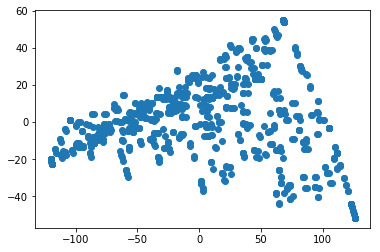

In [13]:
plt.scatter(*X[:, :2].T)

In [31]:
names = [file.replace('../../solo_sounds/', '').replace('.mp3', '') for file in files]

In [32]:
names

['Balafon2_Bright',
 'Bass_Trombone_Solo',
 'Clarinet_Combi',
 'Clav6_Bright',
 'Clean3_Chorus_Guitar',
 'Concert_Flute_Solo_Legato_Vibrato',
 'Cuba_Trumpet',
 'Double_Bass_Solo_Staccato',
 'Dual_Osc6_Vibrato_Bass',
 'Guitar-Dual_Amped_Heavy',
 'Guitar-Reverse_FX',
 'Hammer_Dulcimer',
 'Harp',
 'Low_Wow',
 'Marimba1_Classic',
 'Pan_Flute_Winds',
 'Piccolo_Solo_Legato_Vibrato',
 'Plastic_Vibraphone',
 'Plucked',
 'Rhythmic_Octaves_Bass',
 'Shamisen',
 'Sneaky_Bass',
 'So_High',
 'Suitar_Guitar',
 'Upright_Bass',
 'Violin_Solo',
 'Wurly_Speaker',
 'cat',
 'cow',
 'dog',
 'goose',
 'thunder']

In [33]:
names.index('goose')

30

array(['Bass_Trombone_Solo_Guitar-Dual_Amped_Heavy/0_60.mp3',
       'Bass_Trombone_Solo_Guitar-Dual_Amped_Heavy/1_60.mp3',
       'Bass_Trombone_Solo_Guitar-Dual_Amped_Heavy/2_60.mp3', ...,
       'Marimba1_Classic_dog/2_60.mp3', 'Marimba1_Classic_dog/3_60.mp3',
       'Marimba1_Classic_dog/4_60.mp3'], dtype='<U66')

In [122]:
origin = feat[0]
target = feat[1] + np.random.random(origin.shape) * 0.1
# target = feat[1]
delta = origin - target

In [123]:
deltas = feat - target

In [124]:
cossim = np.matmul(delta, deltas.T) / (np.linalg.norm(delta) * np.linalg.norm(deltas, axis=1))

In [125]:
cossim

array([ 1.        ,  0.26993197, -0.9560461 , ...,  0.14147948,
        0.08658993,  0.00801754])

(array([ 71.,  10.,  22.,  13.,  76., 197., 662., 132.,  51.,  41.]),
 array([-0.98081237, -0.78273113, -0.58464989, -0.38656866, -0.18848742,
         0.00959382,  0.20767505,  0.40575629,  0.60383753,  0.80191876,
         1.        ]),
 <a list of 10 Patch objects>)

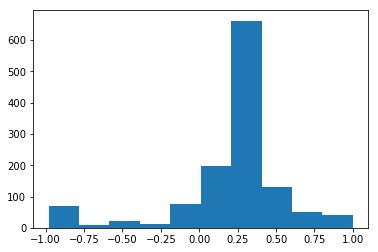

In [126]:
plt.hist(cossim[np.isnan(cossim) == False])

In [127]:
cand = np.arange(len(cossim))[(cossim < -0.8) & (np.isnan(cossim) == False)]

In [128]:
cand_feat = feat[cand]
cand_deltas = deltas[cand]

In [129]:
dest_index = np.argsort(np.linalg.norm(cand_deltas, axis=1))[0]

In [130]:
dest_feat = cand_feat[dest_index]

In [131]:
dest_feat

array([ 0.3853401 ,  0.39403135,  0.34338167, ...,  0.18100257,
        0.09017172, -0.1857859 ], dtype=float32)

In [142]:
origin_dist = np.linalg.norm(target - origin)
dest_dist = np.linalg.norm(target - dest_feat)

origin_rate = dest_dist / (origin_dist + dest_dist)
dest_rate = origin_dist / (origin_dist + dest_dist)

In [150]:
interp = origin_rate * origin + dest_rate * dest_feat

In [153]:
(interp - target).min()

-0.1201131596694971